# DS 6011: Read in data

- Andrew J. Graves
- 9/25/20

In [1]:
%matplotlib notebook

# Import modules
import numpy as np
import mne

# Example file from example subject
raw = mne.io.read_raw_edf('S001R04.edf')

# Print the information
raw.info['nchan']

Extracting EDF parameters from C:\Users\Andrew Graves\Documents\University of Virginia\Course Work\Fall 2020\ds_6011\S001R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


64

In [2]:
# Print the EEG data shape
shape = raw.get_data().shape
print(shape)

(64, 20000)


In [3]:
# Sampling and Nyquist frequency
samp_freq = raw.info['sfreq']
nyq = samp_freq / 2
print(nyq)

80.0


In [4]:
# Task time
shape[1] / (samp_freq)

125.0

In [5]:
# T0 is baseline, T1 is left fist / both, T2 if right fist / both
ev = mne.events_from_annotations(raw)
print(ev[1])
np.delete(ev[0], 1, axis=1)

Used Annotations descriptions: ['T0', 'T1', 'T2']
{'T0': 1, 'T1': 2, 'T2': 3}


array([[    0,     1],
       [  672,     3],
       [ 1328,     1],
       [ 2000,     2],
       [ 2656,     1],
       [ 3328,     2],
       [ 3984,     1],
       [ 4656,     3],
       [ 5312,     1],
       [ 5984,     3],
       [ 6640,     1],
       [ 7312,     2],
       [ 7968,     1],
       [ 8640,     3],
       [ 9296,     1],
       [ 9968,     2],
       [10624,     1],
       [11296,     3],
       [11952,     1],
       [12624,     2],
       [13280,     1],
       [13952,     2],
       [14608,     1],
       [15280,     3],
       [15936,     1],
       [16608,     2],
       [17264,     1],
       [17936,     3],
       [18592,     1],
       [19264,     2]])

<IPython.core.display.Javascript object>


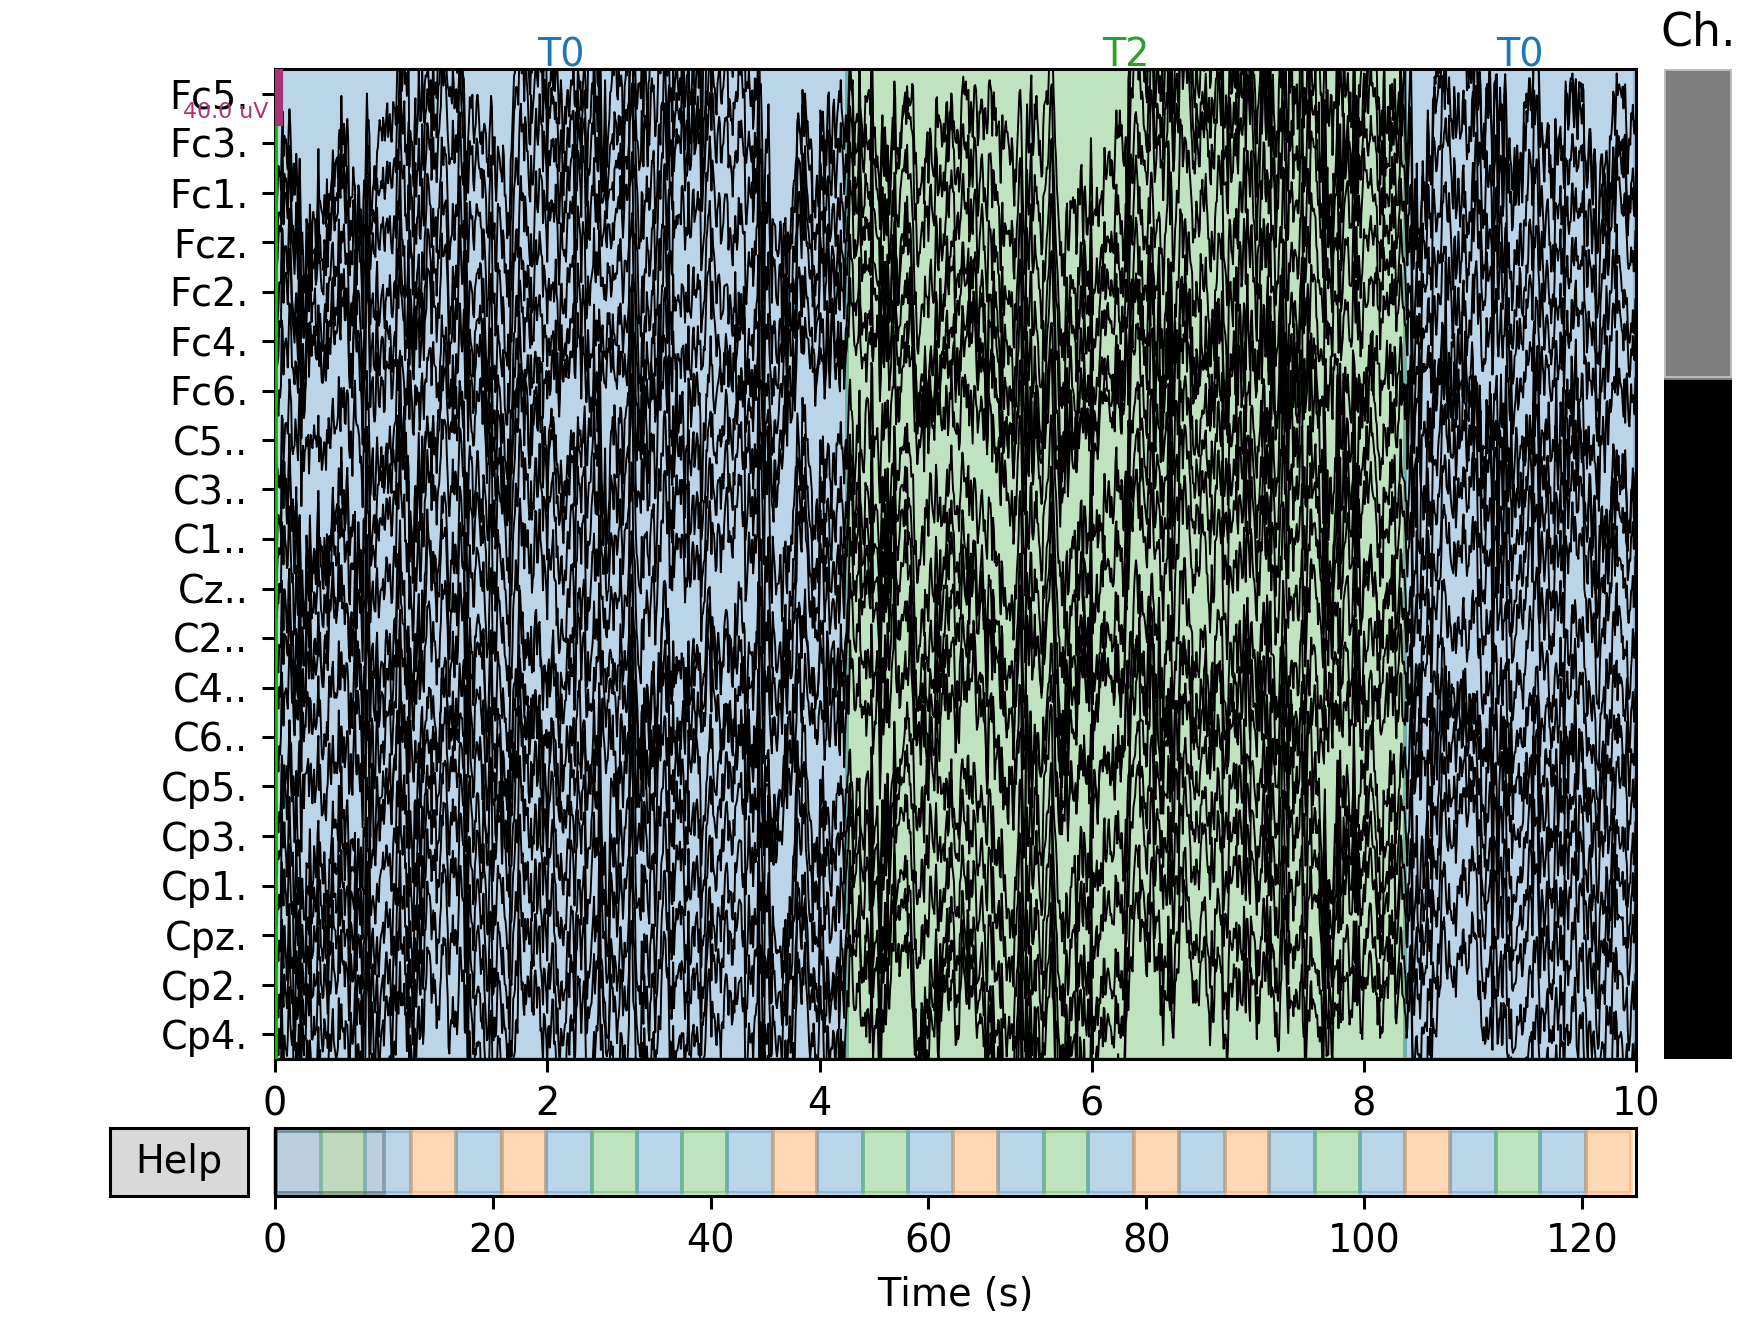

In [6]:
unfilt = raw.plot()

Setting up band-stop filter from 0.5 - 79 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 79.00 Hz: -6.02, -6.02 dB



<IPython.core.display.Javascript object>


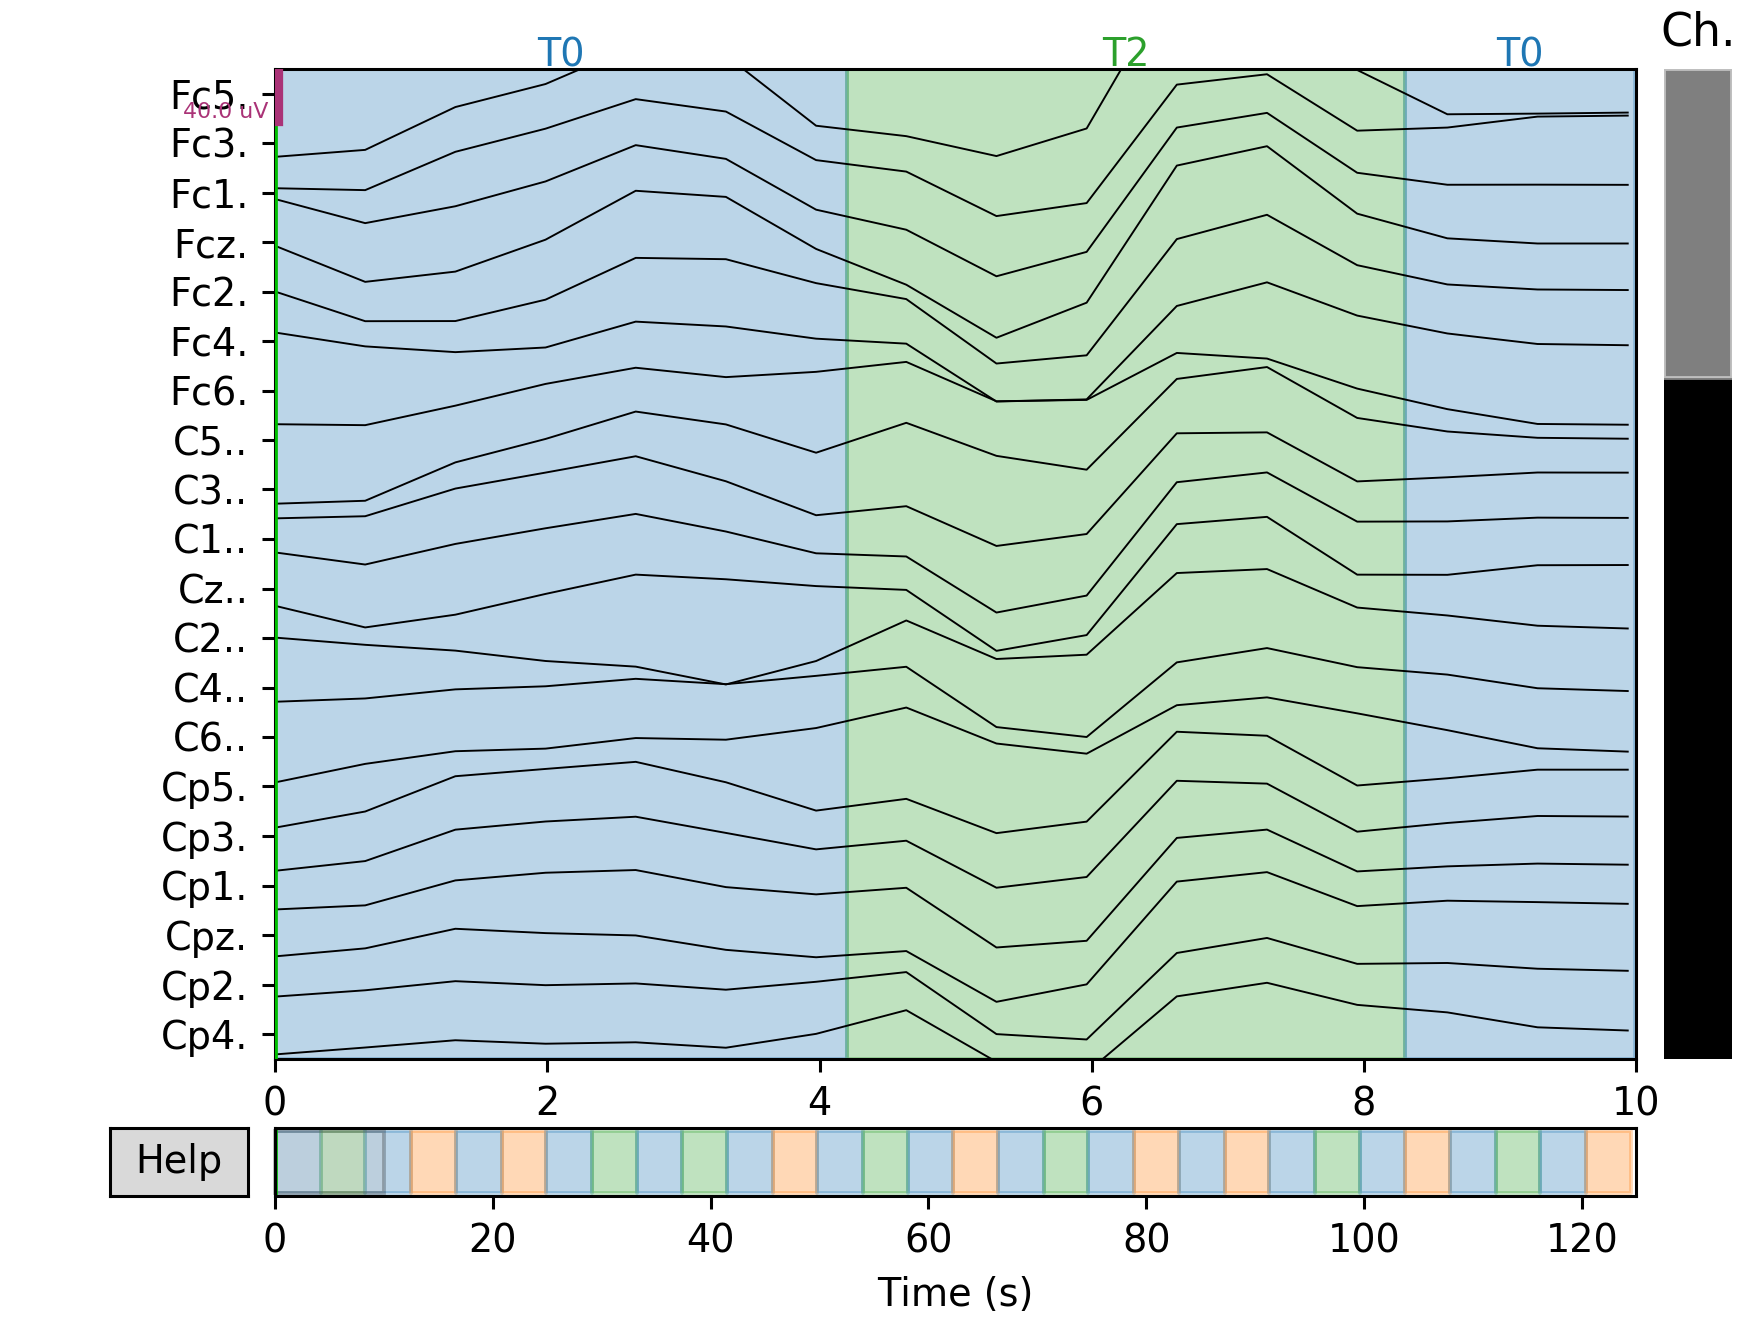

In [7]:
filt = raw.plot(highpass=nyq-1, lowpass=.5)